# 1. Linear layer

- Linear layer는 선형 변환을 활용해 데이터를 특정 차원으로 변환하는 기능을 한다. 100차원의 데이터를 300차원으로 변환한다면 데이터를 더 풍부하게 표현하는 효과가 있고, 반대로 10차원의 데이터로 변환한다면 데이터를 집약시키는 효과가 있다.

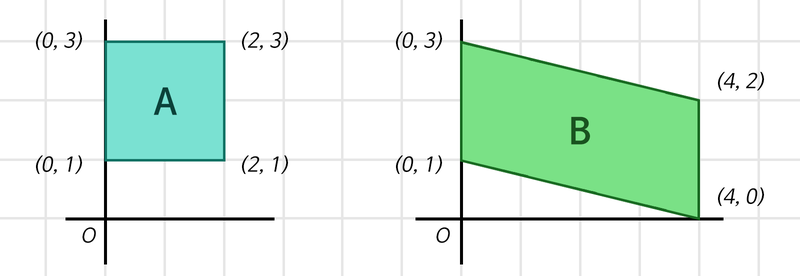


In [1]:
import tensorflow as tf

### (1) Weight

In [2]:
batch_size = 64
boxes = tf.zeros((batch_size, 4, 2))
print("1단계 연산 준비 : ", boxes.shape)

1단계 연산 준비 :  (64, 4, 2)


In [3]:
first_linear = tf.keras.layers.Dense(units=1, use_bias=False)  #units는 출력 차원 수

first_out = first_linear(boxes)
print(first_out.shape)

(64, 4, 1)


In [5]:
first_out = tf.squeeze(first_out, axis=-1)  #(4,1)을 (4,)로 변환 (불필요한 차원 축소)

print("1단계 연산 결과 : ", first_out.shape)
print("1단계 Linear layer의 weight 형태 : ", first_linear.weights[0].shape)

1단계 연산 결과 :  (64, 4)
1단계 Linear layer의 weight 형태 :  (2, 1)


In [6]:
print("2단계 연산 준비 : ", first_out.shape)

2단계 연산 준비 :  (64, 4)


In [10]:
second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
print(second_out.shape)

(64, 1)


In [11]:
second_out = tf.squeeze(second_out, axis=-1)

In [12]:
print("2단계 연산 결과 : ", second_out.shape)
print("2단계 Linear layer의 weight 형태 : ", second_linear.weights[0].shape)

2단계 연산 결과 :  (64,)
2단계 Linear layer의 weight 형태 :  (4, 1)


- ?? : weight 형태가 왜 (2,1), (4,1) 일까?
- !! : (4,2) 를 (4,1) 형태로 만들기 위해서는 (2,1) 행렬을 곱해줘야 한다. (4x2)x(2x1) = (4x1)

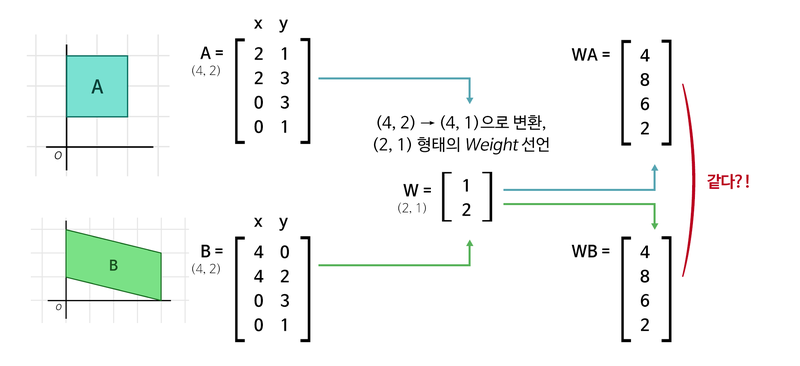

#### parameter 갯수

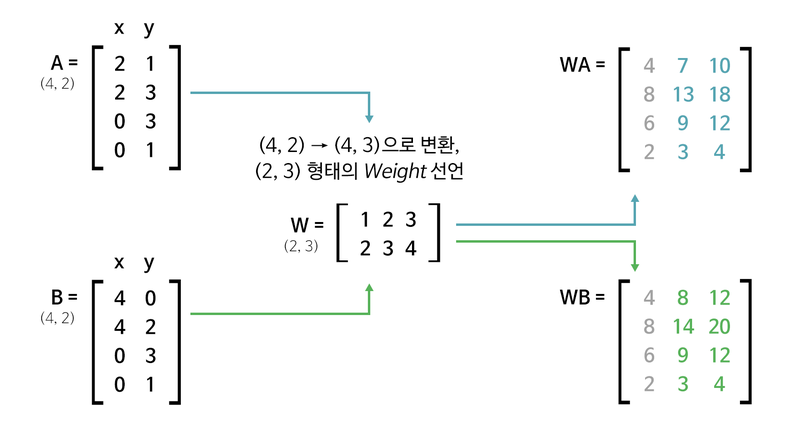

1단계 : (4x2)x(2x3) = (4x3)   
2단계 : (4x3)x(3x1) = (4x1)   
3단계 : (4,)x(4x1) = (1,)   
   
   
- 여기서 총 몇 개의 parameter가 사용되었나?
(2x3) + (3x1) + (4x1) , 총 6+3+4 = 13개 사용되었다.

### (2) Bias

- 편향이 없다면 파라미터를 아무리 돌리고 늘리고 해도 정확하게 근사할 수 없다. 단순히 생각해서 원점을 평행이동 하는 것만으로도 해결할 수 있다.

# 2. Convolution layer

- Linear layer를 이용해서 웬만한 데이터를 다룰 수 있을 것 같지만,

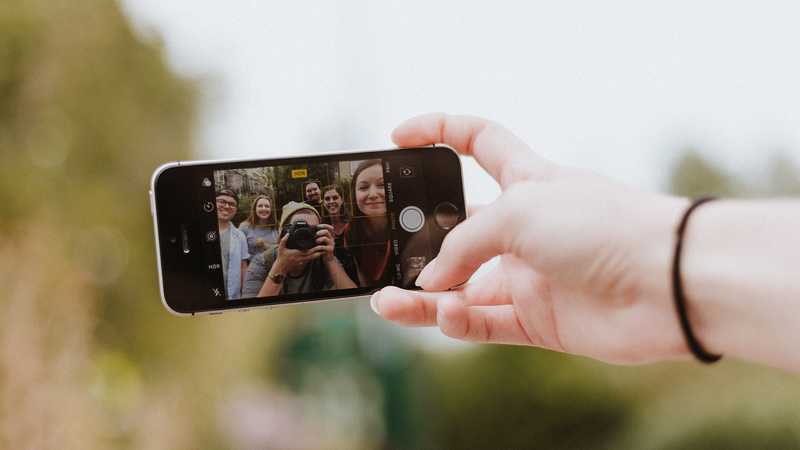

이런 데이터는   
1단계 : (1920,1080,3) -> (1920x1080x3,)   
2단계 : (6220800,)x(6220800 x 1 Weight) = (1,)   

적어도 620만 개의 parameter가 생성된다.   

그래서 고안된 것이 Convolution layer 이다.
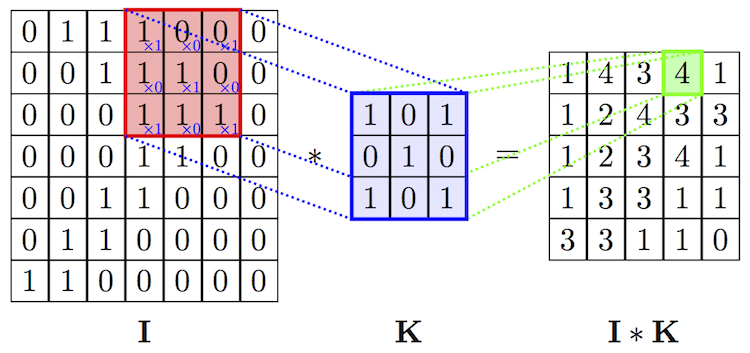

사진을 선명하게 하는 필터, 흐리게 하는 필터 등 다양한 필터들이 convolution을 위한 행렬로 정의되어 있다!   
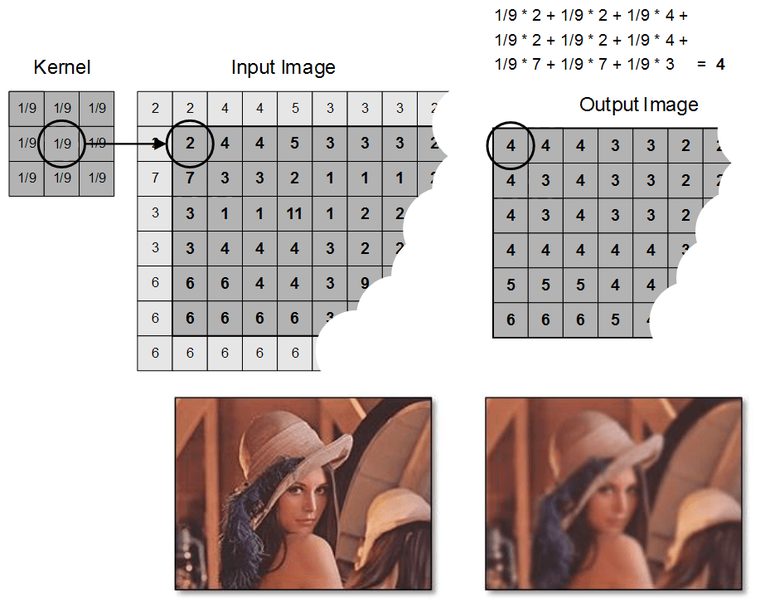

즉, convolution 연산이 입력의 형태를 변형시킨다.

- stride
이미지를 필터로 훑을 때, 한 칸씩 이동하며 훑을 수도 있지만, 두 칸, 세 칸씩 이동하며 훑을 수도 있는데, 그것을 결정하는 값을 stride 라고 한다.   
   
   
- padding
이미지의 맨 구석 모서리에 중요한 픽셀이 있다고 가정했을 때, padding이 없을 경우 해당 픽셀은 convolution 필터가 한 번 밖에 보지 못한다. padding을 해줄 경우, 모서리의 픽셀도 내곽 픽셀처럼 취급하게 되어 해당 픽셀을 충분히 살필 수 있게 된다.

#### 그럼 Convolution layer는 뭘까?
앞에서 필터를 사용하여 어떤 이미지는 선명하게, 어떤 이미지는 흐리게 했었다. 즉, 훈련을 통해 도움이 되는 정보는 선명하게, 그렇지 않은 정보는 흐리게 만드는 필터를 찾아주는 것이 바로 Convolution layer가 하는 일이다!!

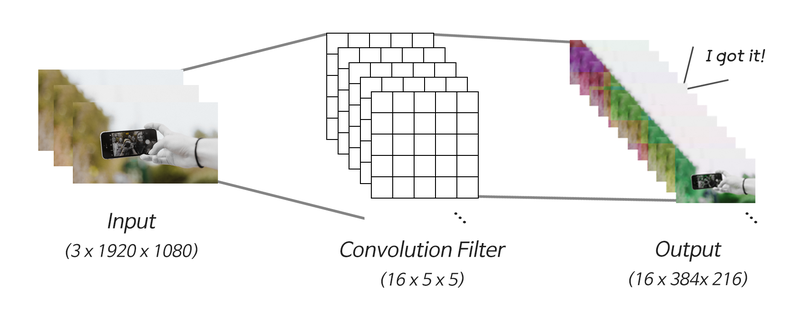

In [14]:
pic = tf.zeros((batch_size, 1920, 1080, 3))

print("입력 이미지 데이터 : ", pic.shape)

입력 이미지 데이터 :  (64, 1920, 1080, 3)


In [15]:
conv_layer = tf.keras.layers.Conv2D(16, (5,5), strides=5, use_bias=False)
conv_out=conv_layer(pic)

print("convolution 결과 : ", conv_out.shape)
print("convolution layer의 parameter 수 : ", conv_layer.count_params())

convolution 결과 :  (64, 384, 216, 16)
convolution layer의 parameter 수 :  1200


In [16]:
flatten_out = tf.keras.layers.Flatten()(conv_out)
print("1차원으로 펼친 데이터 : ", flatten_out.shape)

1차원으로 펼친 데이터 :  (64, 1327104)


In [17]:
linear_layer = tf.keras.layers.Dense(units=1, use_bias=False)
linear_out = linear_layer(flatten_out)

In [19]:
print("Linear 결과 : ", linear_out.shape)
print("Linear layer의 parameter 수 : ", linear_layer.count_params())

Linear 결과 :  (64, 1)
Linear layer의 parameter 수 :  1327104


# 3. Pooling layer

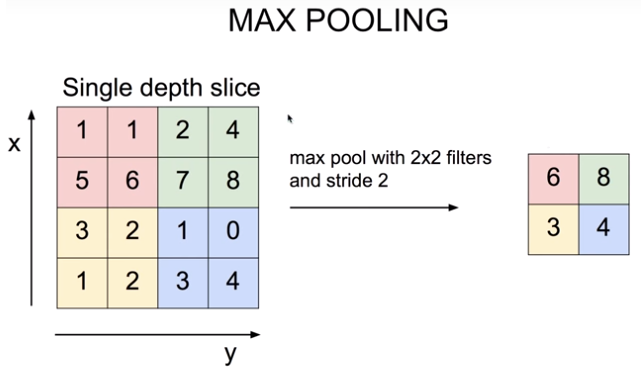